# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
print(data.shape)
print(data.isna().values.any()) # False
print(data.columns)
print(data.duplicated().values.any()) # False
print(type(data.columns)) # <class 'pandas.core.indexes.base.Index'>

(5391, 6)
False
Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')
False
<class 'pandas.core.indexes.base.Index'>


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [6]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(',', "").str.replace('$', "")
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)

data.USD_Worldwide_Gross  = data.USD_Worldwide_Gross.astype(str).str.replace(',', "").str.replace('$', "")
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

data.USD_Domestic_Gross   = data.USD_Domestic_Gross.astype(str).str.replace(',', "").str.replace('$', "")
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [7]:
data.Release_Date  = pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [8]:
# 1. What is the average production budget of the films in the data set?
# column_averages = np.mean(data, axis=0)
#              Rank     USD_Production_Budget	USD_Worldwide_Gross	USD_Domestic_Gross
data.describe() # mean	2,696.00	31,113,737.58	88,855,421.96	41,235,519.44
# 31,113,737.58

# 2. What is the average worldwide gross revenue of films?
# 88,855,421.96
# 3. What were the minimums for worldwide and domestic revenue?
# 0.00
# 4. Are the bottom 25% of films actually profitable or do they lose money?
# budget: 5,000,000.00, revenue: 3,865,206.00, lose money
# 5. What are the highest production budget and highest worldwide gross revenue of any film?
#　425,000,000.00，　2,783,918,982.00
# 6. How much revenue did the lowest and highest budget films make?
# 0.00, 2,783,918,982.00

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [9]:
# So which film was the lowest budget film in the dataset?
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [10]:
# the highest budget film in the dataset is:
data[data.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [11]:
print(len(data[data.USD_Domestic_Gross == 0])) # 512
data[data.USD_Domestic_Gross == 0].sort_values("USD_Production_Budget", ascending=False).head()

512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [12]:
print(len(data[data.USD_Worldwide_Gross == 0])) # 357
data[data.USD_Worldwide_Gross == 0].sort_values("USD_Production_Budget", ascending=False).head()
# 512 and 357, Why?
# The reason some international films were never screened in the United States.

357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [13]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                  (data.USD_Worldwide_Gross != 0)]
print(len(international_releases))
international_releases.head()

155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [14]:
international_releases2 = data.query(("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0"))
print(len(international_releases2))
international_releases2.head()

155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [15]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
print(f"scrape_date = {scrape_date}")
future_releases = data.loc[(data.Release_Date >= scrape_date)]
print(len(future_releases))
future_releases.head()

scrape_date = 2018-05-01 00:00:00
7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


In [16]:
data_clean = data.drop(future_releases.index)
data_clean.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [17]:
money_losing = data_clean.loc[(data_clean.USD_Production_Budget >= data_clean.USD_Worldwide_Gross)]
print(len(data_clean)) # 5384
print(len(money_losing)) # 2007
print(len(money_losing)*100 / len(data_clean)) # 37.27711738484398
money_losing

5384
2007
37.27711738484398


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


# Seaborn for Data Viz: Bubble Charts

In [18]:
import seaborn as sns

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

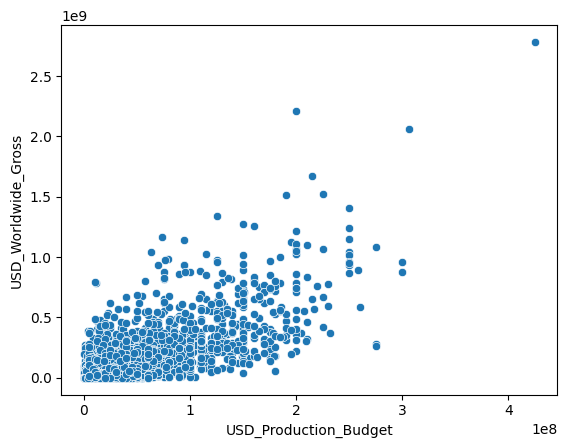

In [19]:
sns.scatterplot(data=data_clean,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross')

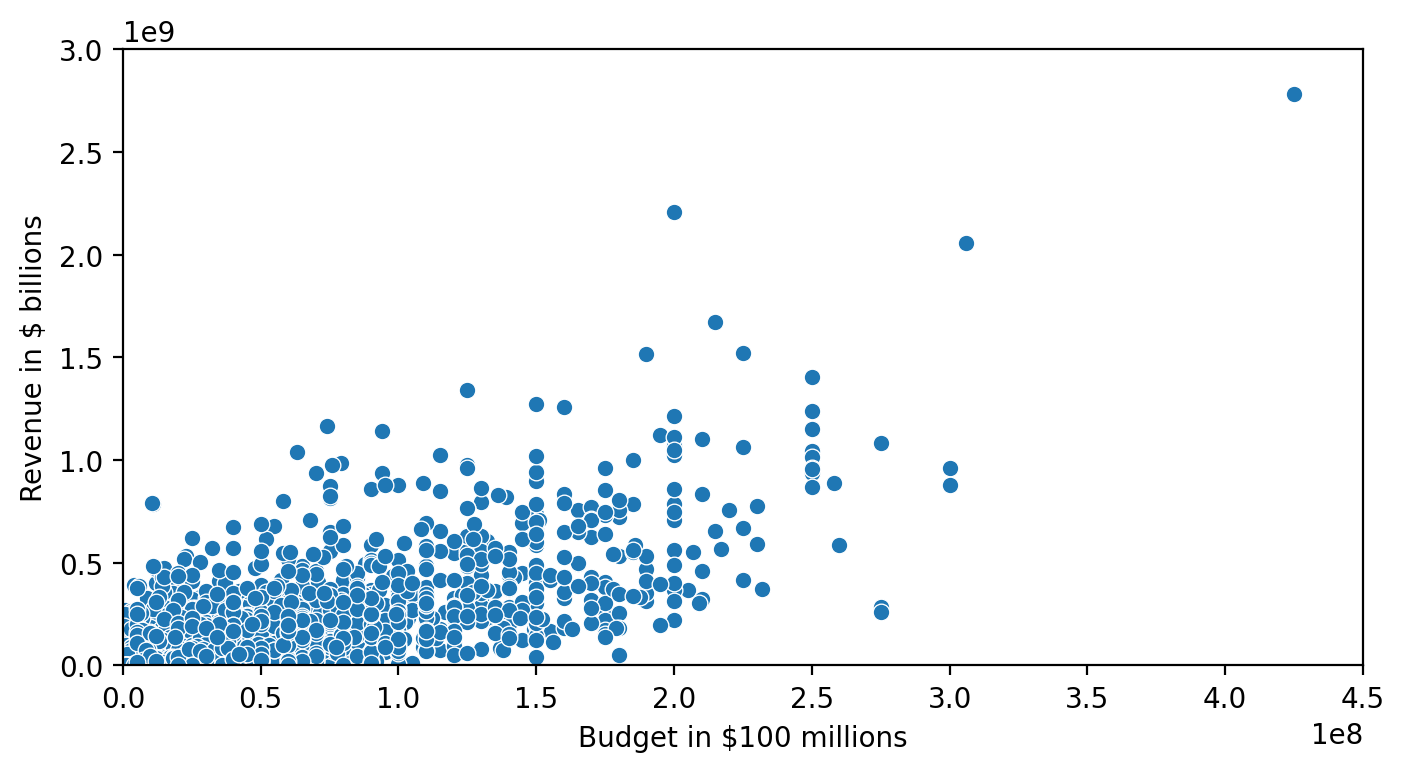

In [20]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
    xlim=(0, 450000000),
    ylabel='Revenue in $ billions',
    xlabel='Budget in $100 millions')
plt.show()

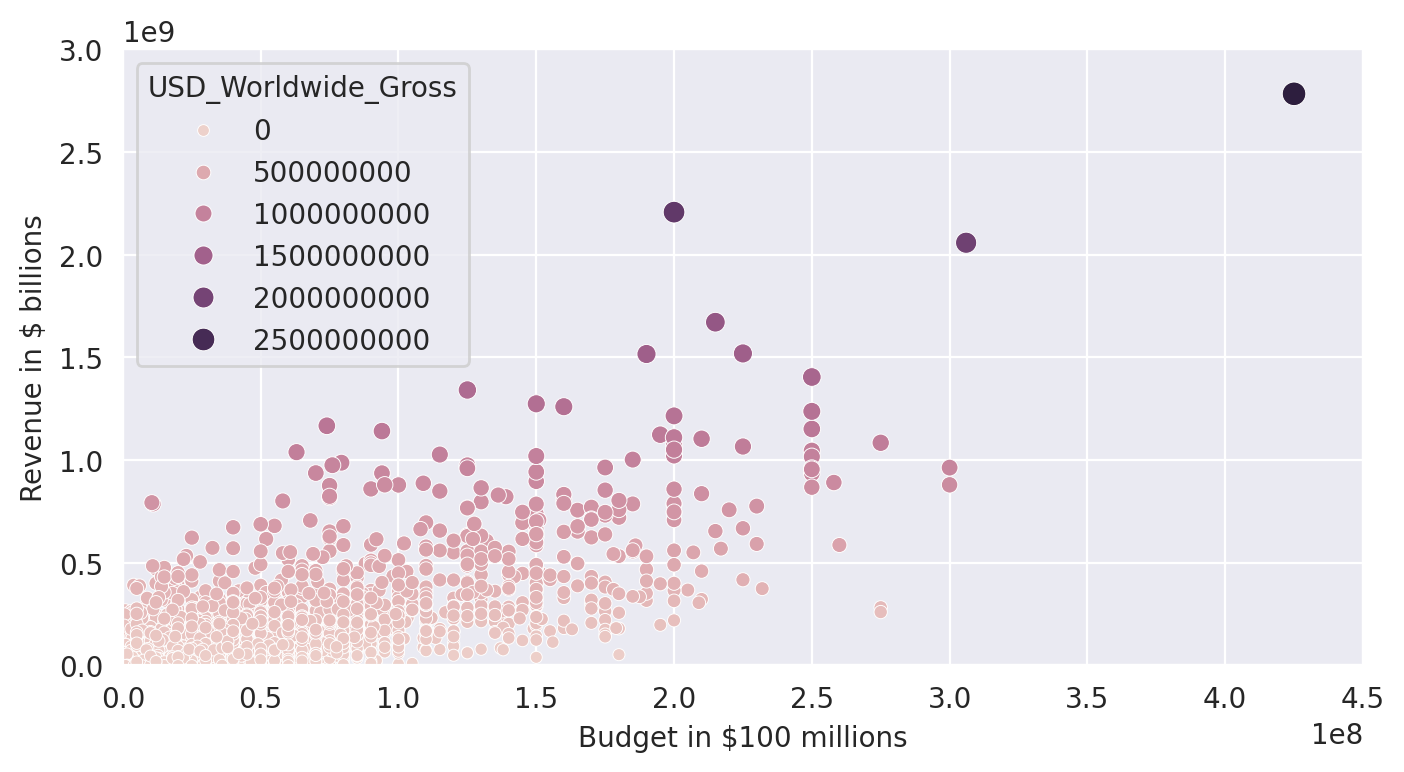

In [21]:
plt.figure(figsize=(8,4), dpi=200)
# set styling on a single chart
with sns.axes_style('darkgrid'): # {darkgrid|whitegrid|dark|ticks}
    ax = sns.scatterplot(data=data_clean,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        hue='USD_Worldwide_Gross', # colour
        size='USD_Worldwide_Gross',) # dot size

    ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions',)

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



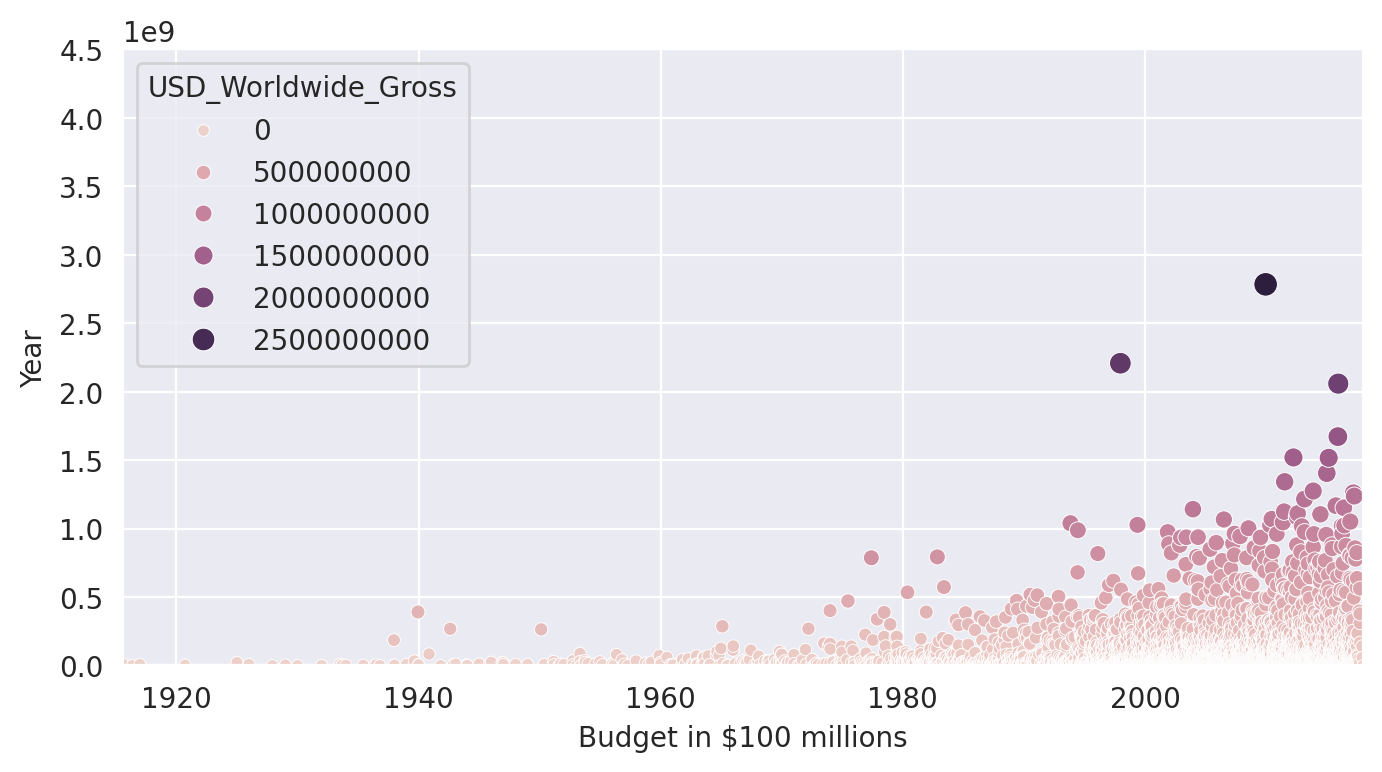

In [26]:
plt.figure(figsize=(8,4), dpi=200)
# set styling on a single chart
with sns.axes_style('darkgrid'): # {darkgrid|whitegrid|dark|ticks}
    ax = sns.scatterplot(data=data_clean,
        x='Release_Date',
        y='USD_Worldwide_Gross',
        hue='USD_Worldwide_Gross', # colour
        size='USD_Worldwide_Gross',) # dot size

    ax.set(ylim=(0, 4500000000),
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        ylabel='Year',
        xlabel='Budget in $100 millions',)

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [48]:
years  = pd.DatetimeIndex(data_clean.Release_Date).year
print(years)
data_clean.Decade = (years // 10)*10
data_clean.head()


Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [51]:
old_films = data_clean.loc[(data_clean.Decade <= 1969)]
new_films = data_clean.loc[(data_clean.Decade > 1970)]

print(old_films.head())
print(len(old_films)) # 153
print(new_films.head())
print(len(new_films)) # 5122


   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
0             11000000            10000000    1910  
1                    0                   0    1910  
2              8000000             8000000    1910  
3              3000000             3000000    1920  
4             22000000            11000000    1920  
153
     Rank Release_Date         Movie_Title  USD_Production_Budget  \
262  1624   1980-01-01  Lion of the Desert               35000000   
263  3805   1980-01-01     Dressed to Kill                6500000

# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

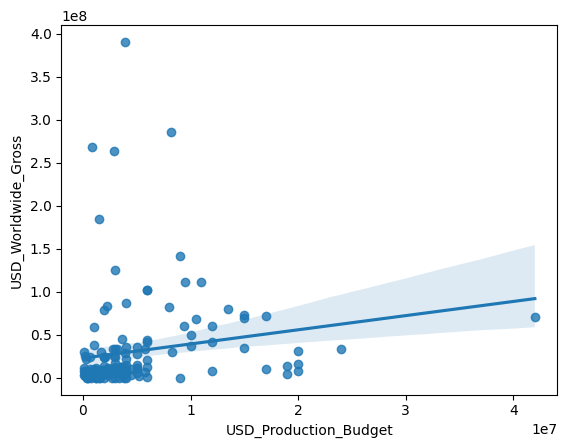

In [52]:
# using linear regression
# reg = regression
sns.regplot(data=old_films,
      x='USD_Production_Budget',
      y='USD_Worldwide_Gross')

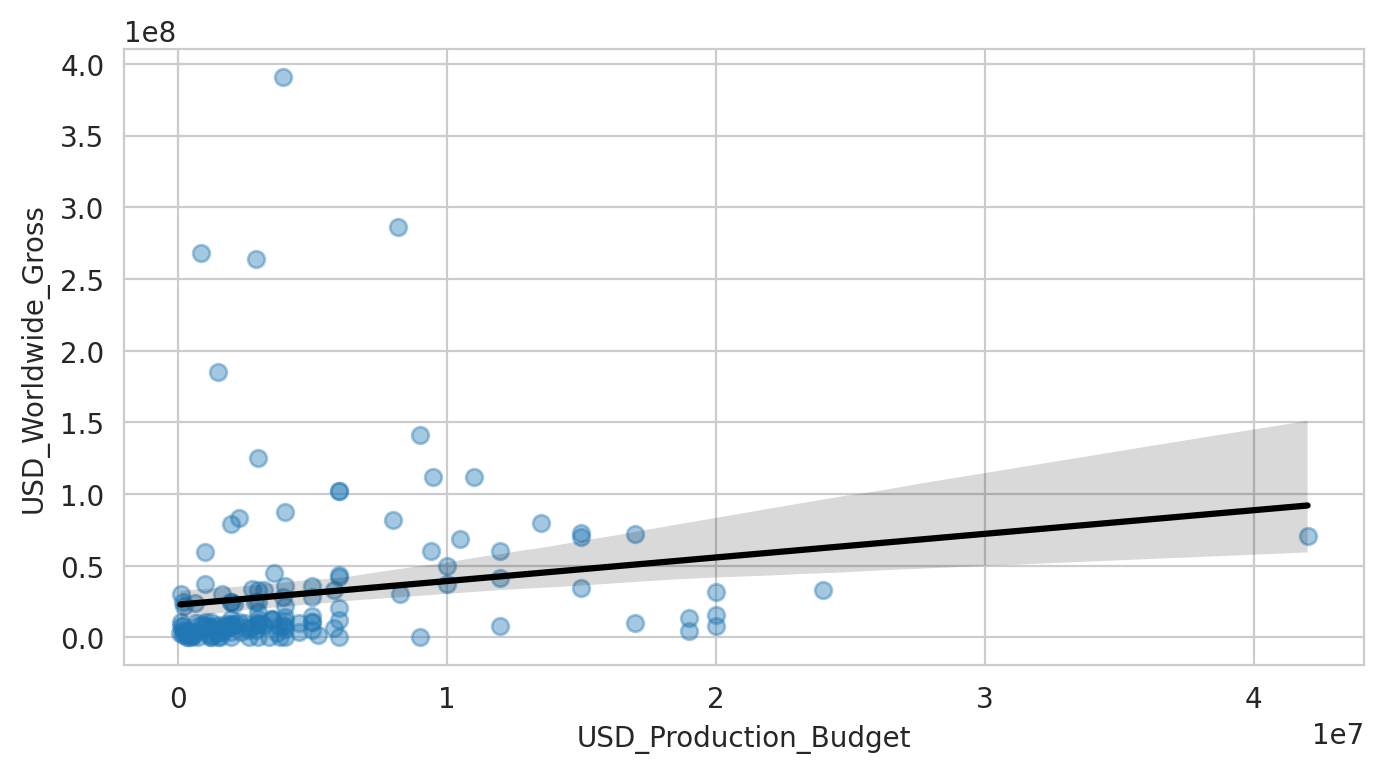

In [56]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        scatter_kws = {'alpha': 0.4},
        line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

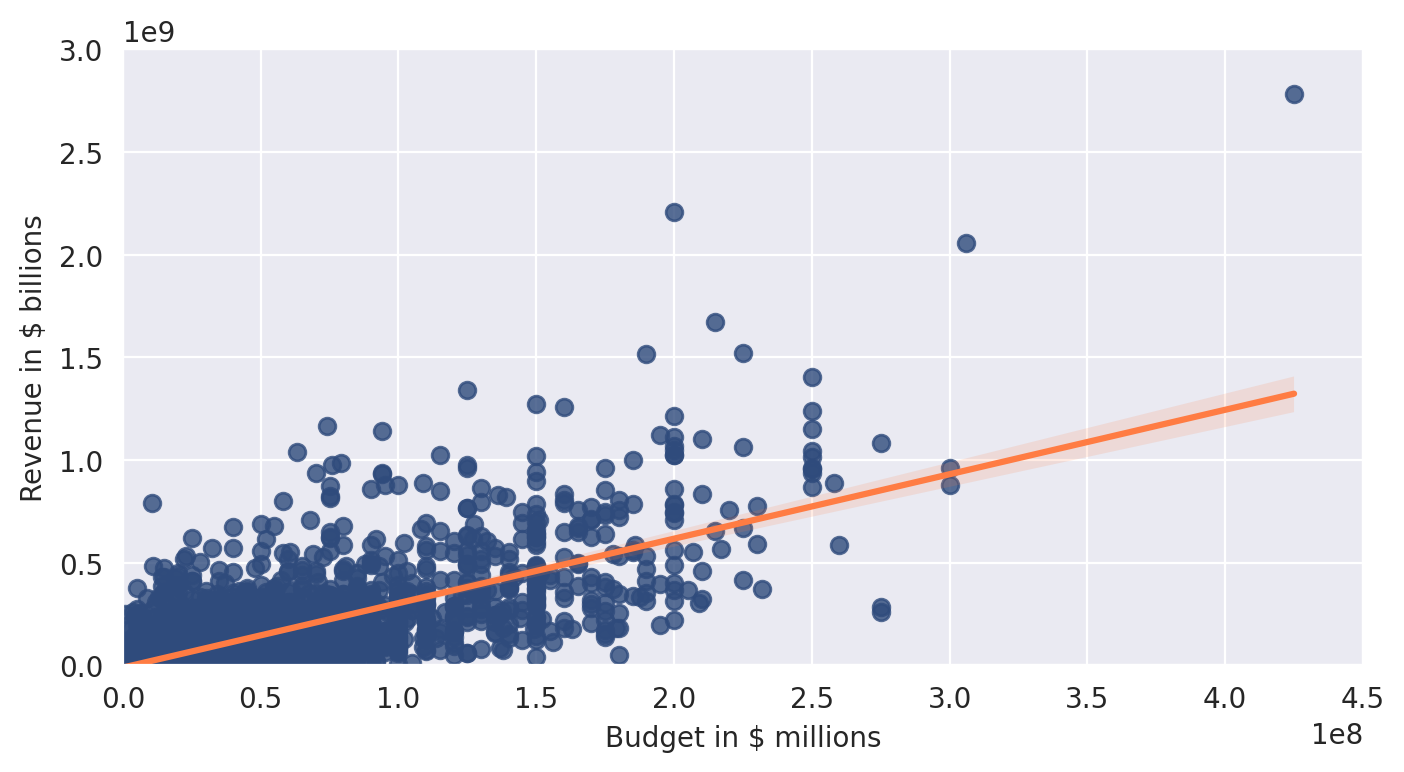

In [64]:
# sns.regplot(data=new_films,
#       x='USD_Production_Budget',
#       y='USD_Worldwide_Gross')

plt.figure(figsize=(8,4), dpi=200)
# set styling on a single chart
with sns.axes_style('darkgrid'): # {darkgrid|whitegrid|dark|ticks}
   ax = sns.regplot(data=new_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        color="#2f4b7c",
        line_kws=dict(color="#ff7c43"),)

   ax.set(
        ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $ millions',)

plt.show()


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [66]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [67]:
regression = LinearRegression()

In [68]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [69]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [70]:
# Theta zero
print(regression.intercept_)
# Theta one
print(regression.coef_) # [[3.13834648]]
# Theta one = scope, can earn $3.1 per $1

[-10278584.79397978]
[[3.13834648]]


In [71]:
# R-squared
regression.score(X, y) # 0.564250171393927
# This means that our model explains about 56% of the variance in movie revenue.
# if a researcher can build a simple model that explains over 50% or so of
# what is actually happening, then it's a pretty decent model.

0.564250171393927

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [73]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [74]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [75]:
# Theta zero
print(regression.intercept_)
# Theta one
print(regression.coef_) # [[1.64771314]]
# Theta one = scope, can earn $1.6 per $1

[22821538.63508039]
[[1.64771314]]


In [78]:
# R-squared
regression.score(X, y) # 0.02937258620576877
# This means that our model explains about 3% of the variance in movie revenue.
# only 3%, old_films model 不准

0.02937258620576877